In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import joblib


In [2]:
df = pd.read_csv("/content/Titanic dataset.csv")

# Select useful columns
df = df[['Pclass','Sex','Age','Fare','Survived']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

X = df.drop('Survived', axis=1)
y = df['Survived']


/tmp/ipython-input-2166587914.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}


In [5]:
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })


In [6]:
results_df = pd.DataFrame(results)
results_df


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.51625,0.475,0.432099,0.372340,0.400000
1,Decision Tree,1.00000,0.510,0.480000,0.510638,0.494845
2,Random Forest,1.00000,0.530,0.500000,0.521277,0.510417
3,SVM,0.59250,0.475,0.454545,0.585106,0.511628


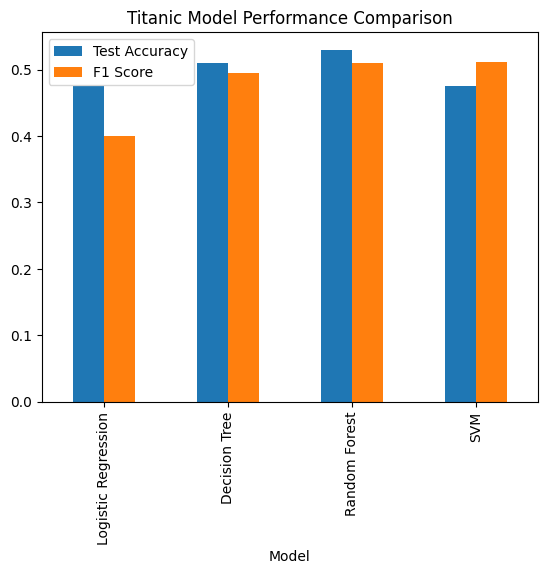

In [7]:
results_df.set_index("Model")[["Test Accuracy","F1 Score"]].plot(kind='bar')
plt.title("Titanic Model Performance Comparison")
plt.show()


In [8]:
results_df["Overfitting Gap"] = results_df["Train Accuracy"] - results_df["Test Accuracy"]
results_df.sort_values("Overfitting Gap")


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Overfitting Gap
0,Logistic Regression,0.51625,0.475,0.432099,0.372340,0.400000,0.04125
3,SVM,0.59250,0.475,0.454545,0.585106,0.511628,0.11750
2,Random Forest,1.00000,0.530,0.500000,0.521277,0.510417,0.47000
1,Decision Tree,1.00000,0.510,0.480000,0.510638,0.494845,0.49000


In [9]:
best_model_name = results_df.sort_values("F1 Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

final_pipeline.fit(X_train, y_train)

joblib.dump(final_pipeline, "titanic_best_model.pkl")


['titanic_best_model.pkl']